# Training the first Machine Learning model to convert celcius to Farenheit

## Import dependencies for ML

In [0]:

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)  #telling tensorflow to only to log the error messages
import numpy as np

## Setting up the training data

In [25]:
#

celsius_q = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahrenheit_a = np.array([-40,14,32,46,59,72,100],dtype =float)

for i , c in enumerate (celsius_q):
  print("{} degrees Celcius = {} degree Fahrenheit ".format(c,fahrenheit_a[i]))

-40.0 degrees Celcius = -40.0 degree Fahrenheit 
-10.0 degrees Celcius = 14.0 degree Fahrenheit 
0.0 degrees Celcius = 32.0 degree Fahrenheit 
8.0 degrees Celcius = 46.0 degree Fahrenheit 
15.0 degrees Celcius = 59.0 degree Fahrenheit 
22.0 degrees Celcius = 72.0 degree Fahrenheit 
38.0 degrees Celcius = 100.0 degree Fahrenheit 


## Creating a Model 

In [0]:
#feature is the input to our model 
#labels is the output our model predicts 
#example is the pair of input/output used during the training.
#

l0 = tf.keras.layers.Dense(units=1,input_shape=[1]) #here we call our layer l0(Layer 0 ) and instantiate by tf.keras.layers.Dense, input_shape = [1] means layers is a single value.
                                                     #One dimensional array with one member. units =1 specifies the number of neurons in the layer.
 

In [0]:
# assemble the model 
model = tf.keras.Sequential([l0])

##Compile the model, with loss and optimizer functions

In [0]:
 
#Loss Function - A way of measuring how far off predictions are from the desired outcomed. (Difference is called loss)
#Optimizer Function - A way of adjusting internal values in order to reduce the loss. 
model.compile(loss ='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))  # here 0.1 is the learning rate (0.001 <= learning rate =>0.1  usually )


## Train the Model 

In [29]:
#first argument is inputs, second arguments is desired output.
#Epochs specifies how many times this cycle (calculate,compare,adjust) should be run 
# Verbose argument controls how much output the method produces. 
# 1 epoch is the full iteration of the example we have seen
history = model.fit(celsius_q,fahrenheit_a,epochs=500,verbose=False)  # we trained it with 3500 examples (7 pairs over 500 epochs)
print ("Finished training the model ")

Finished training the model 


#Display the training Statistics

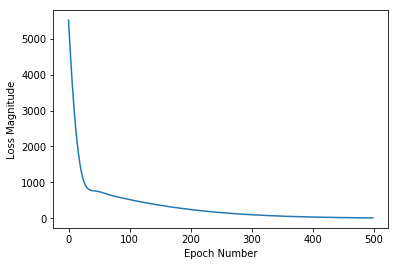

In [30]:
#fit method return the history object and we can use this object to plot how loss of our model goes down after each training epoch
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

##Use the model to predict the values

In [31]:
print(model.predict([200]))

[[393.8923]]


##Looking at the layer weight

In [32]:
print("These are the layer variables: {}".format(l0.get_weights()))  # here we will see that first value is ~1.8 and second value ~32. f = 1.8c+32

These are the layer variables: [array([[1.8259442]], dtype=float32), array([28.703455], dtype=float32)]
